In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from utilities import mk_heatmap, value_heatmap, update_grade
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/home/boada/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


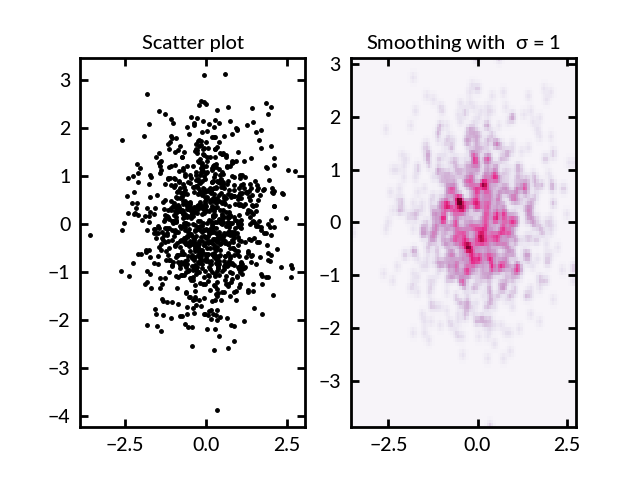

In [2]:
fig, axs = plt.subplots(1, 2)

# Generate some test data
np.random.seed(1234)
x = np.random.randn(1000)
y = np.random.randn(1000)

sigmas = [0, 1]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent, xedges, yedges = mk_heatmap(x, y, s, bins=100)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

In [4]:
# Load all the data
inspecs = pd.read_csv('./data/inspections.csv')
threeoneone = pd.read_csv('./data/311.csv')
nypd = pd.read_csv('./data/nypd.csv')

# Replace the missing lats and lons with nan
inspecs['latitude'].replace(0, np.nan, inplace=True)
inspecs['longitude'].replace(0, np.nan, inplace=True)
threeoneone['latitude'].replace(0, np.nan, inplace=True)
inspecs['longitude'].replace(0, np.nan, inplace=True)
nypd['latitude'].replace(0, np.nan, inplace=True)
inspecs['longitude'].replace(0, np.nan, inplace=True)

# Do date things
inspecs.inspection_date = pd.to_datetime(inspecs.inspection_date)
threeoneone.created_date = pd.to_datetime(threeoneone.created_date)
nypd.complaint_date = pd.to_datetime(nypd.complaint_date)


# make a column to store which day of the week it is... 
# Remember that Monday is 0 Sunday = 6
inspecs['weekday'] = inspecs.inspection_date.dt.weekday
threeoneone['weekday'] = threeoneone.created_date.dt.weekday
nypd['weekday'] = nypd.complaint_date.dt.weekday

In [5]:
inspecs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236073 entries, 0 to 236072
Data columns (total 16 columns):
camis                    236073 non-null int64
dba                      236073 non-null object
boro                     236073 non-null object
zipcode                  232526 non-null float64
cuisine_description      236073 non-null object
inspection_date          236073 non-null datetime64[ns]
action                   236073 non-null object
violation_code           233083 non-null object
violation_description    231475 non-null object
critical_flag            231475 non-null object
score                    225856 non-null float64
grade                    119906 non-null object
inspection_type          236073 non-null object
latitude                 232278 non-null float64
longitude                232278 non-null float64
weekday                  236073 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 28.8+ MB


In [6]:
threeoneone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 13 columns):
created_date      300000 non-null datetime64[ns]
agency            300000 non-null object
complaint_type    300000 non-null object
descriptor        299259 non-null object
incident_zip      271668 non-null float64
address_type      293070 non-null object
city              271867 non-null object
facility_type     45185 non-null object
borough           300000 non-null object
latitude          267308 non-null float64
longitude         267308 non-null float64
location_type     178067 non-null object
weekday           300000 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 29.8+ MB


In [7]:
nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
complaint_date           300000 non-null datetime64[ns]
complaint_code           300000 non-null int64
complaint_description    299967 non-null object
offense_lvl              300000 non-null object
boro                     299785 non-null object
premisis_type            298870 non-null object
latitude                 299783 non-null float64
longitude                299783 non-null float64
weekday                  300000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 20.6+ MB


In [8]:
df[['inspection_type', 'grade', 'score']].head(20)

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>


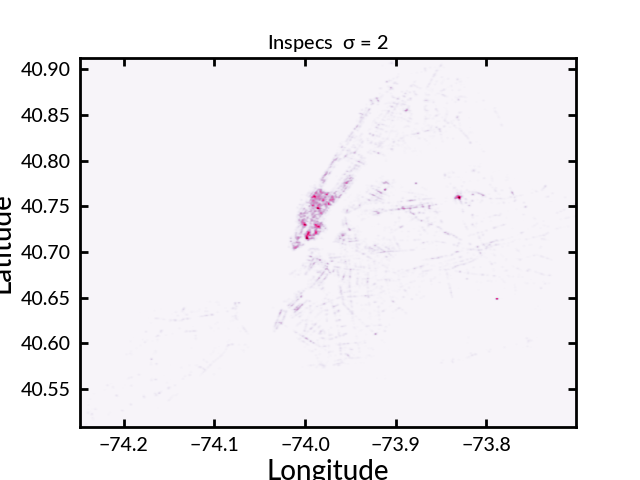

Text(0, 0.5, 'Latitude')

In [9]:
fig, ax = plt.subplots(1,1)

x = inspecs.longitude
y = inspecs.latitude

s = 2

img, extent, xedges, yedges = mk_heatmap(x, y, s, bins=1000)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
ax.set_title("Inspecs  $\sigma$ = %d" % s)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

<IPython.core.display.Javascript object>


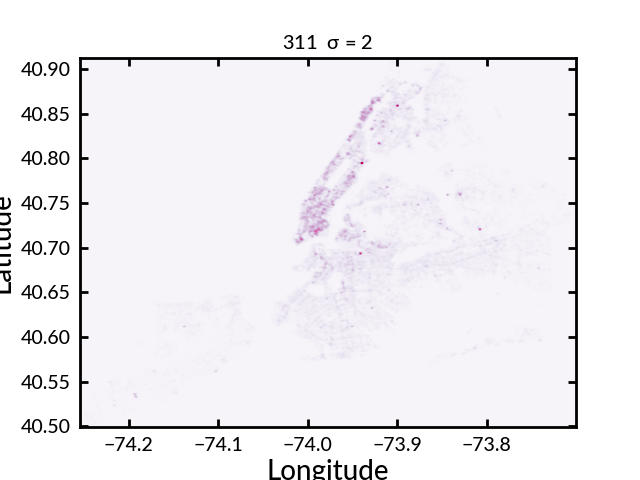

Text(0, 0.5, 'Latitude')

In [11]:
fig, ax = plt.subplots(1,1)

x = threeoneone.longitude
y = threeoneone.latitude

s = 2

img, extent, xedges, yedges = mk_heatmap(x, y, s, bins=1000)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
ax.set_title("311  $\sigma$ = %d" % s)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

<IPython.core.display.Javascript object>


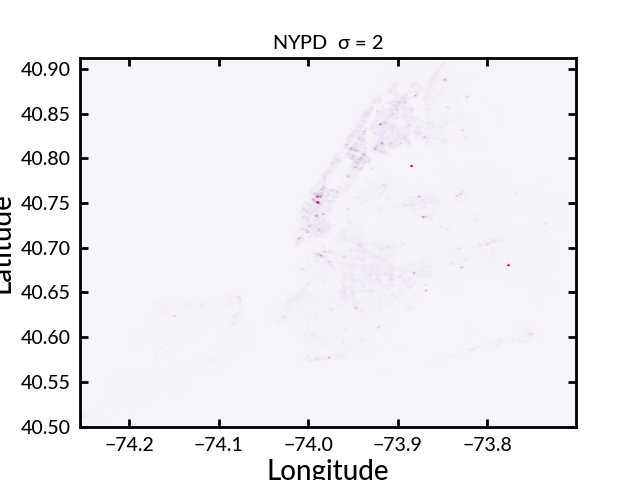

Text(0, 0.5, 'Latitude')

In [10]:
fig, ax = plt.subplots(1,1)

x = nypd.longitude
y = nypd.latitude

s = 2

img, extent, xedges, yedges = mk_heatmap(x, y, s, bins=1000)
ax.imshow(img, extent=extent, origin='lower', cmap=cm.PuRd)
ax.set_title("NYPD  $\sigma$ = %d" % s)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [18]:
index = pd.DatetimeIndex(freq='W', start=inspecs.inspection_date.min(), end=inspecs.inspection_date.max())
# tweets = [random.choice( for _ in range(len(index))]
time_df = pd.DataFrame(index=index, data=inspecs.critical_flag, columns=['critical_flag'])
time_df['day'] = time_df.index.date
time_df['count'] = 1

/home/boada/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [ ]:
code_map = {
    '02':'FOOD TEMPERATURE',
    '03':'FOOD SOURCE',
    '04':'PERSONAL HYGIENE/FOOD PROTECTION',
    '05':'FACILITY DESIGN',
    '06':'PERSONAL HYGIENE/FOOD PROTECTION',
    '08':'VERMIN/GARBAGE',
    '09':'FACILITY MAINTENANCE',
    '10':'FACILITY DESIGN',
    '07':'OTHER',
    '20':'LETTER GRADE CARD/OTHER POSTER ABSENT',
    '16':'MENU DESCRIPTION IMPROPER',
    '22':'OTHER',
    '15':'NO SMOKING POLICY',
    '18':'OTHER',
    'na':'NONE' 
}

In [21]:
inspecs[['violation_code', 'violation_description', 'critical_flag']][inspecs.violation_code == '22F']

,violation_code,violation_description,critical_flag
156,22F,NaN,NaN
7583,22F,NaN,NaN
9564,22F,NaN,NaN
11007,22F,NaN,NaN
11322,22F,NaN,NaN
...,...,...,...
233145,22F,NaN,NaN
233446,22F,NaN,NaN
234000,22F,NaN,NaN
234101,22F,NaN,NaN


In [ ]:
df.violation_code.unique()

In [ ]:
daily_counts = time_df.groupby(by=['critical_flag', 'day']).count()
daily_counts_xtab = daily_counts.unstack(level='critical_flag')['count']
print(daily_counts_xtab.head(20))
daily_counts_xtab.plot()

<IPython.core.display.Javascript object>


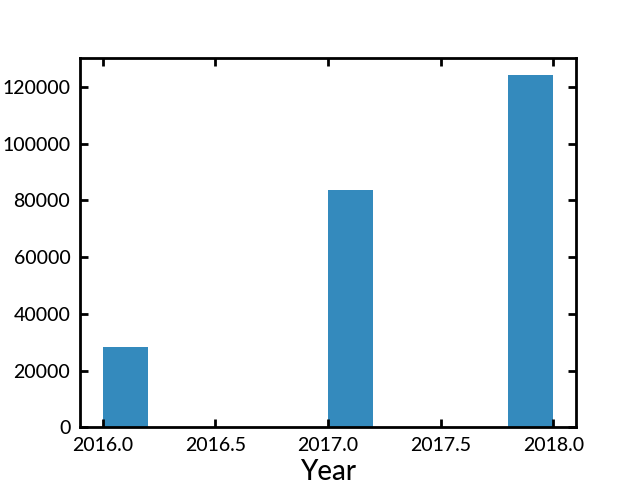

Text(0, 0.5, 'Count of Inspections')

In [14]:
year_hist = inspecs.inspection_date.dt.year
#year_hist = year_hist.value_counts().sort_index()

plt.hist(year_hist)

# plt.bar(year_hist.index, year_hist.values)
plt.xlabel("Year")
plt.ylabel("Count of Inspections")

<IPython.core.display.Javascript object>


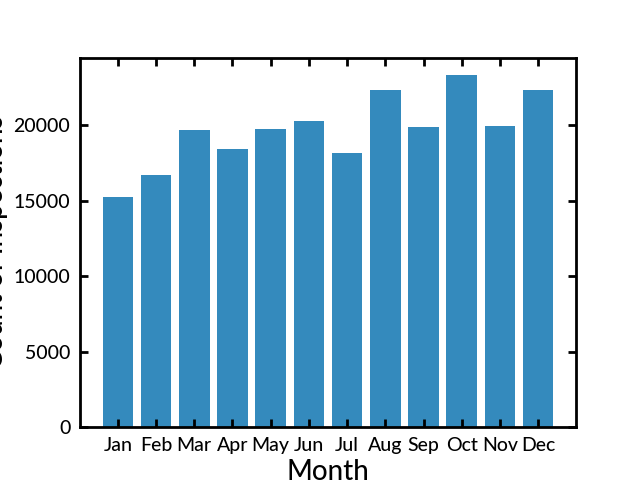

In [15]:
month_hist = inspecs.inspection_date.dt.month
month_hist = month_hist.value_counts().sort_index()
month_hist.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(month_hist.index, month_hist.values)
plt.xlabel("Month")
plt.ylabel("Count of Inspections")
plt.show()

<IPython.core.display.Javascript object>


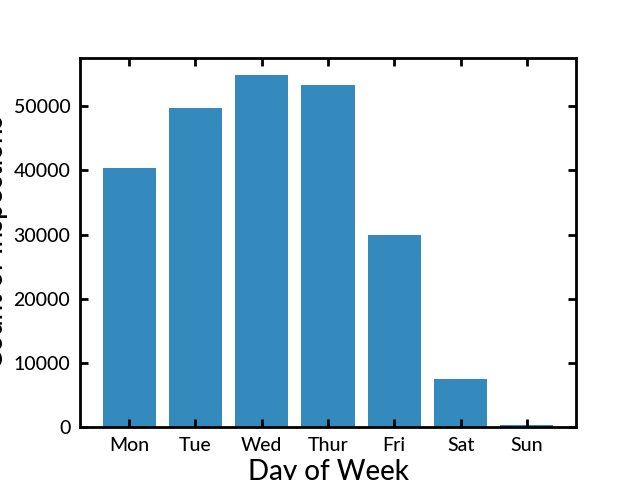

In [16]:
day_hist = year_hist = inspecs.inspection_date.dt.weekday
day_hist = day_hist.value_counts().sort_index()
day_hist.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
plt.bar(day_hist.index, day_hist.values)
plt.xlabel("Day of Week")
plt.ylabel("Count of Inspections")
plt.show()

In [17]:
# clean up the grades in the inspections
inspecs.grade = inspecs.apply(update_grade, axis=1)

In [ ]:
threeoneone.describe()

In [ ]:
threeoneone.info()

In [ ]:
threeoneone[threeoneone.agency == 'DSNY'].complaint_type.unique()

In [ ]:
threeoneone[threeoneone.agency == 'DEP'].complaint_type.unique()

In [ ]:
threeoneone[threeoneone.agency == 'DOHMH'].complaint_type.unique()

In [ ]:
threeoneone.agency

In [ ]:
nypd.complaint_code.unique()

In [ ]:
nypd.complaint_description.unique()

In [ ]:
searchfor =  ['BURGLARY', 'PETIT LARCENY']

nypd[nypd.complaint_description.str.contains('|'.join(searchfor))]

In [ ]:
nypd.info()